<a href="https://colab.research.google.com/github/mkdirlife/orm/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EC%97%B0%EA%B5%AC%EC%86%8C_5%EC%A3%BC%EC%B0%A8_1%EC%9D%BC_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 판다스 개요

In [3]:
# 판다스 import
import pandas as pd # as pd 별명/별칭

# 데이터프레임 생성
# 딕셔너리 형태로 가져온다.
data = {'이름': ['홍길동', '임꺽정', '이순신'],
        '나이': [30, 35, 40],
        '도시': ['서울', '부산', '광주']}
#DataFrame 함수를 가져온다.
df = pd.DataFrame(data)
print(df)

    이름  나이  도시
0  홍길동  30  서울
1  임꺽정  35  부산
2  이순신  40  광주


In [6]:
import pandas as pd

# 시리즈 생성
names = pd.Series(['홍길동', '임꺽정', '이순신'])
print(names)
type(names)

0    홍길동
1    임꺽정
2    이순신
dtype: object


pandas.core.series.Series

In [ ]:
import pandas as pd

# 엑셀 파일을 DataFrame으로 불러오기
df = pd.read_excel("example.xlsx")
df = pd.read_csv("example.csv")



In [2]:
import pandas as pd
# 요구정의서 / 컬럼에 대한 히스토리! 를 파악하는 것이 중요.
test = pd.read_csv("/content/sample_data/california_housing_test.csv")
print(test.head())
print('')
print(test.tail())
print('')
# DataFrame 의 요약 정보 출력
print(test.info())
# Null
# 1. Null 이 있으면 머신러닝 모델의 대부분을 돌리지 못합니다. (딥러닝도 거의 동일)
# xgboost / 딥러닝 일부 모델 중 옵션변경  (Null -> 하나의 값! 으로 치환해서 쓰는 경우 있음)
# Null -> 0(X), NAN(X) Null을 임의로 치환하는 것은 굉장히 위험하다.
# Null 최대한 제거하고 분석하는 것을 추천 -> Null을 가지고 있는 데이터가 다른 데이터와 다른지 아닌지 파악 하는 것이 중요.


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.1

In [4]:
# DataFrame의 통계적 요약 정보 출력
# 1. Min / Max -> 9999999 / -9999999 / 이상한 문자로 된 값 ******** 이런 값들이 Min 이나 Max에 나옴.
# 2. Mean -> 평균이 우리가 아는 수치와 비슷한지 확인
# 3. 25% 50% 75% -> 데이터가 편중되어 있는지 아니면 잘 분포되어 있는지 -> 표준편차
# 3번 예) 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 4 5 (우리 어플 사용량!)
print(test.describe())



         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000    780.000000   273.00000       2.5

In [18]:
# inplace 매개변수를 사용하지 않는 경우
# 판다스 대부분의 메서드에서는 기본적으로 데이터프레임의 복사본을 수정하고, 원본 데이터프레임은 그대로 유지
df = df.dropna()


In [19]:
# inplace=True를 사용하는 경우
#  이 매개변수를 True로 설정하면, 메서드는 데이터프레임의 복사본을 만들지 않고 원본 데이터프레임을 직접 수정
df.dropna(inplace=True)

In [46]:
import pandas as pd
import numpy as np

# 샘플 데이터프레임 생성
# 문자형 데이터는 describe() 사용해도 통계량이 나오지 않는다. -> count() 정도로 수만 셀 수 있다.
data = {'이름': ['홍길동', '임꺽정', None],
        '나이': [30, None, 40],
        '도시': ['서울', '부산', '광주']}
df = pd.DataFrame(data)

# 결측치가 포함된 데이터프레임 출력
print("원본 데이터프레임:\n", df)

원본 데이터프레임:
      이름    나이  도시
0   홍길동  30.0  서울
1   임꺽정   NaN  부산
2  None  40.0  광주


In [44]:
# 결측치가 포함된 데이터프레임 출력
print("원본 데이터프레임:\n", df)

# 결측치 제거
df.dropna(inplace=True) # inplace 잘못써서 원본 자체를 날릴수도 있다. 주의!!

# 결측치가 제거된 데이터프레임 출력
print("\n결측치 제거 후 데이터프레임:\n", df)

원본 데이터프레임:
     이름    나이  도시
0  홍길동  30.0  서울

결측치 제거 후 데이터프레임:
     이름    나이  도시
0  홍길동  30.0  서울


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      2 non-null      object 
 1   나이      2 non-null      float64
 2   도시      3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


In [48]:
df.describe()

,나이
count,2.000000
mean,35.000000
std,7.071068
min,30.000000
25%,32.500000
50%,35.000000
75%,37.500000
max,40.000000


# 2. 데이터프레임과 시리즈

In [49]:
# Pandas DataFrame 예시
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
})

# 각 속성 호출
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Index:", df.index)
print("Columns:", df.columns)

Shape: (3, 3)
Data Types:
 Name    object
Age      int64
City    object
dtype: object
Index: RangeIndex(start=0, stop=3, step=1)
Columns: Index(['Name', 'Age', 'City'], dtype='object')


In [51]:
import pandas as pd

# CSV 파일 로드
file_path = '/content/sample_data/california_housing_test.csv'
df = pd.read_csv(file_path)

# 데이터프레임의 처음 5행 출력
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


In [52]:
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (3000, 9)


In [53]:
print("Data Types:\n", df.dtypes)

Data Types:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [54]:
print("Index:", df.index)

Index: RangeIndex(start=0, stop=3000, step=1)


In [55]:
print("Columns:", df.columns)

Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [63]:
import pandas as pd

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob'],  # 문자열 타입
    'Age': ['25', '30'],       # 숫자 데이터를 문자열로 표현
    'Member': ['True', 'False'],  # 불린 데이터를 문자열로 표현
    'Join Date': ['2021-01-01', '2021-07-01']  # 날짜 데이터를 문자열로 표현
}

# DB -> 문자열! -> 메모리 / 저장용량 효율적!
# 숫자나 날짜도 보통 데이터타입 보다 문자열로 되어 있는 경우가 많음.

df = pd.DataFrame(data)

# 결과 출력
print(df)
print(df.dtypes)

    Name Age Member   Join Date
0  Alice  25   True  2021-01-01
1    Bob  30  False  2021-07-01
Name         object
Age          object
Member       object
Join Date    object
dtype: object


In [62]:
# 데이터 타입 변환
df['Age'] = df['Age'].astype(int)  # 'Age' 열을 정수형으로 변환
df['Member'] = df['Member'].astype(bool)  # 'Member' 열을 불린형으로 변환
df['Join Date'] = pd.to_datetime(df['Join Date'])  # 'Join Date' 열을 datetime으로 변환

# 결과 출력
print(df)
print(df.dtypes)

    Name  Age  Member  Join Date
0  Alice   25    True 2021-01-01
1    Bob   30    True 2021-07-01
Name                 object
Age                   int64
Member                 bool
Join Date    datetime64[ns]
dtype: object


In [65]:
df_joindate = df['Join Date']   # 컬럼 하나만 있을땐 series
df_joindate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2 entries, 0 to 1
Series name: Join Date
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


In [68]:
df_joindate = df[['Join Date', 'Age']]    # 컬럼 두개 있을땐 dataFrame
df_joindate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Join Date  2 non-null      object
 1   Age        2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes


In [89]:
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
}
df = pd.DataFrame(data)

# 단일 열 선택 -> 결과는 Series
age_series = df['Age']
print(type(age_series))

<class 'pandas.core.series.Series'>


In [79]:
# 다중 열 선택 -> 결과는 DataFrame
subset_df = df[['Name', 'City']]
print(type(subset_df))

<class 'pandas.core.frame.DataFrame'>


In [80]:
# loc 사용 예시 - 변수명을 넣는다.
print(df.loc[:, 'Age'])

0    25
1    30
2    35
Name: Age, dtype: int64


In [81]:
# iloc 사용 예시 - 위치를 넣는다.
print(df.iloc[:, 1])

0    25
1    30
2    35
Name: Age, dtype: int64


In [88]:
print(df)

# 결측치 추가
df.loc[1, 'Age'] = np.nan

print(df)

# 결측치 확인 isnull -> null 이 아니면 False, null 이면 True
print(df['Age'].isnull())

      Name   Age      City
0    Alice  25.0  New York
1      Bob   NaN     Paris
2  Charlie  35.0    Berlin
      Name   Age      City
0    Alice  25.0  New York
1      Bob   NaN     Paris
2  Charlie  35.0    Berlin
0    False
1     True
2    False
Name: Age, dtype: bool


In [92]:
# series 메서드 활용
import pandas as pd

# Series 생성
data = pd.Series([10, 20, 20, 30, 40, 30, 30, 15])

# sum(), mean(), value_counts() 사용 예시
print("Sum:", data.sum())           # 합계 series 에서만 작동
print("Mean:", data.mean())         # 평균 series 에서만 작동
print("Value Counts:\n", data.value_counts())  # 빈도 계산 series 에서만 작동

Sum: 195
Mean: 24.375
Value Counts:
 30    3
20    2
10    1
40    1
15    1
dtype: int64


In [95]:
# Series 와 DataFrame 을 다루는 메서드가 다름
import pandas as pd

# Series 생성
data = pd.Series([10, 15, 20, 25, 30, 20, 15])

# 다양한 메서드 활용
print("Minimum:", data.min())          # 최소값
print("Maximum:", data.max())          # 최대값
print("Standard Deviation:", data.std())  # 표준편차
print("Variance:", data.var())          # 분산 분산 에 root 씌운게 표준편차
print("Number of Unique Values:", data.nunique())  # 고유값 개수

# 데이터프레임 요약
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 55000, 60000, 65000, 70000]
})
print("\nDataFrame Summary:\n", df.describe())
print("\nDataFrame Info:")
df.info()

Minimum: 10
Maximum: 30
Standard Deviation: 6.7259270913454925
Variance: 45.238095238095234
Number of Unique Values: 5

DataFrame Summary:
              Age       Salary
count   5.000000      5.00000
mean   35.000000  60000.00000
std     7.905694   7905.69415
min    25.000000  50000.00000
25%    30.000000  55000.00000
50%    35.000000  60000.00000
75%    40.000000  65000.00000
max    45.000000  70000.00000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     5 non-null      int64
 1   Salary  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [101]:
# CSV 파일 로드
file_path = '/content/sample_data/california_housing_test.csv'
test = pd.read_csv(file_path)

test_series = test['housing_median_age']
print(test_series)

0       27.0
1       43.0
2       27.0
3       28.0
4       19.0
        ... 
2995    23.0
2996    27.0
2997    10.0
2998    40.0
2999    42.0
Name: housing_median_age, Length: 3000, dtype: float64


In [102]:
# 각 요소에 1 더하기
stars_plus_one = test_series + 1
print("Stars Plus One:\n", stars_plus_one.head())

Stars Plus One:
 0    28.0
1    44.0
2    28.0
3    29.0
4    20.0
Name: housing_median_age, dtype: float64


In [103]:
# 각 요소에 2 곱하기
stars_times_two = test_series * 2
print("Stars Times Two:\n", stars_times_two.head())

Stars Times Two:
 0    54.0
1    86.0
2    54.0
3    56.0
4    38.0
Name: housing_median_age, dtype: float64


In [104]:
print(test_series)

0       27.0
1       43.0
2       27.0
3       28.0
4       19.0
        ... 
2995    23.0
2996    27.0
2997    10.0
2998    40.0
2999    42.0
Name: housing_median_age, Length: 3000, dtype: float64


In [113]:
# 4.0보다 큰 별점 찾기
# 불린 연산이 가능하다 -> 해당하는 값만 가져올 수 있다.
high_age = test_series > 30.0
print("High age:\n", high_age.head())

High age:
 0    False
1     True
2    False
3    False
4    False
Name: housing_median_age, dtype: bool


In [117]:
# 조건을 만족하는 요소만 필터링
filtered_series = test_series[high_age]
print("Filtered Series:\n", filtered_series.head())

filtered_series

Filtered Series:
 1     43.0
5     37.0
6     43.0
9     31.0
10    45.0
Name: housing_median_age, dtype: float64


1       43.0
5       37.0
6       43.0
9       31.0
10      45.0
        ... 
2992    52.0
2993    37.0
2994    35.0
2998    40.0
2999    42.0
Name: housing_median_age, Length: 1401, dtype: float64

In [120]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

print(df)
print()

# 열 이름 변경
# columns({변경하기전 : 변경한후 , 변경하기전 : 변경한 후})
df = df.rename(columns={'A': 'X', 'B': 'Y', 'C': 'Z'})
print(df)

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

   X  Y  Z
0  1  4  7
1  2  5  8
2  3  6  9


In [121]:
# 모든 열 이름 변경
df.columns = ['X', 'Y', 'Z']    # 순서, 위치를 알고 사용해야 함.
print(df)

   X  Y  Z
0  1  4  7
1  2  5  8
2  3  6  9


In [129]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

# 이건 많이 사용하지 않음
# concat / join -> 데이터 결합을 많이 함.
# 기업데이터 다루는 경우가 많고, 새로 생성하는 경우는 많지 않음.
# 'Salary'라는 새 열 추가
df['Salary'] = [50000, 60000, 70000]    # 다른 데이터 프레임을 가져오고 사용하는 경우 있음.
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [130]:
# drop(중요)
# Data 컬럼 천개! ->
# 1. ram 효율을 증대하기 위해서 import 할때만 전체를 가져오되 -> 작업을 할때는 필요한 변수만 가져와서 작업!
# 2. 머신러닝 / 딥러닝 ! -> 분석에 필요한 변수만 가져올때!
# 'Age' 열 삭제
df = df.drop(['Age', 'Name'], axis=1) # axis = 1 열/컬럼 의미 꼭 넣어줘야함(주의)
print(df)

   Salary
0   50000
1   60000
2   70000


In [134]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# 가로로 연결 (열 방향)
result = pd.concat([df1, df2], axis=1)

print(df1)
print()
print(df2)
print()
print(result)


   A  B
0  1  3
1  2  4

   A  B
0  5  7
1  6  8

   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [137]:
import pandas as pd

# Sample DataFrames with different column names
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'X': [5, 6], 'Y': [7, 8]})

print(df1)
print()
print(df2)
print()

# 가로로 연결 (열 방향) -  ignore_index=True 열 이름 다름
# 주의할 점 - df1과 df2가 동일한 행을 가지고 있을때!
# 동일하지 않을땐 join 이용
result = pd.concat([df1, df2], axis=1, ignore_index=True)

print(result)

   A  B
0  1  3
1  2  4

   X  Y
0  5  7
1  6  8

   0  1  2  3
0  1  3  5  7
1  2  4  6  8


In [140]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

print(df1)
print()
print(df2)
print()

# 세로로 연결 (행 방향)
result = pd.concat([df1, df2])  # 세로 연결할땐 axis=0 이고, 생략된 상태

print(result)

   A  B
0  1  3
1  2  4

   A  B
0  5  7
1  6  8

   A  B
0  1  3
1  2  4
0  5  7
1  6  8


In [142]:
# 어떨때 사용할까요?
# 2023년 1월 ~ 2024년 1월 -> 분석 열심히 함.
# 2024년 2월 데이터가 신규로 왔을때 사용할 수 있음.
# 데이터컬럼이 동일할때 세로 결합이 유용함.
import pandas as pd

# Sample DataFrames with different index
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=[0, 1])
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]}, index=[2, 3])

print(df1)
print()
print(df2)
print()

# 세로로 연결 (행 방향) - 인덱스 다름
result = pd.concat([df1, df2], ignore_index=True)

print(result)

   A  B
0  1  3
1  2  4

   A  B
2  5  7
3  6  8

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


In [144]:
# 1. 조건에 대해서 / 내가 무엇을 할지에 대해서 잘 정의
# MAU -> 월별 활성화 고객수
# * 우리 웹에 1회 방문
# * 우리 윕에서 실제로 1회 구매한(유효고객)
# * 3회 이상

#       방문횟수    로그기록    웹사이트활동
# 고객A    1
# 고객B    2
# 고객C    3

# pandas로 구현하는건 어렵지 않을 수 있다.

# 2. 이 중에서 반복작업!
# -> 대시보드
# -> 반복문 / 함수! -> 프로그램화!

# 3. 반복이 되면 패턴!
# -> 패턴을 가지고 EDA 추가적으로 수행
# -> 해당 패턴이 왜 발생되었는가?

# EDA 실습

In [2]:
import pandas as pd
# CSV 파일 로드
file_path = '/content/sample_data/The-Big-List-20231127-Reviews-to-4650.csv'
dataset = pd.read_csv(file_path, encoding='latin1')

In [3]:
dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [4]:
dataset.describe()

,Review #,T
count,4650.000000,0.0
mean,2325.500000,NaN
std,1342.483706,NaN
min,1.000000,NaN
25%,1163.250000,NaN
50%,2325.500000,NaN
75%,3487.750000,NaN
max,4650.000000,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4648 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 254.4+ KB


In [6]:
print(dataset['Brand'].value_counts())

Nissin             567
Maruchan           182
Myojo              152
Nongshim           136
Samyang Foods      122
                  ... 
Kiseki Foods         1
Xiuhe                1
Dr. McDougall's      1
Hi-Lai Foods         1
Westbrae             1
Name: Brand, Length: 698, dtype: int64


In [7]:
# 고유값 확인 -> 중복되지 않는 값!
dataset.nunique()

Review #    4650
Brand        698
Variety     4325
Style         10
Country       54
Stars         53
T              0
dtype: int64

In [157]:
# 총 데이터셋 4650, 7개의 컬럼!

In [8]:
# 결측치 제거
# True = 1, False = 0
print(dataset.isnull().sum())   # null이 갯수가 sum

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          2
T           4650
dtype: int64


In [9]:
dataset = dataset.drop('T', axis=1)

In [10]:
dataset

,Review #,Brand,Variety,Style,Country,Stars
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5
...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4650 non-null   int64 
 1   Brand     4650 non-null   object
 2   Variety   4650 non-null   object
 3   Style     4650 non-null   object
 4   Country   4650 non-null   object
 5   Stars     4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 218.1+ KB


In [12]:
dataset.dropna()

,Review #,Brand,Variety,Style,Country,Stars
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5
...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4650 non-null   int64 
 1   Brand     4650 non-null   object
 2   Variety   4650 non-null   object
 3   Style     4650 non-null   object
 4   Country   4650 non-null   object
 5   Stars     4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 218.1+ KB


In [16]:
# 문자형을 숫자로 변경하는 방법 1. astype 2. to_numeric
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors = 'coerce')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4635 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 218.1+ KB


In [18]:
dataset.describe()

,Review #,Stars
count,4650.000000,4635.000000
mean,2325.500000,3.840982
std,1342.483706,6.440785
min,1.000000,0.000000
25%,1163.250000,3.500000
50%,2325.500000,3.750000
75%,3487.750000,4.500000
max,4650.000000,435.000000


In [19]:
# 중복 데이터 확인
duplicates_count = dataset.duplicated().sum()
print(duplicates_count)

0


In [20]:
# 전체 데이터에 대한 중복 제거
dataset = dataset.drop_duplicates()

In [21]:
# 특정 컬럼에 대한 중복 제거
# 예: 'Brand' 컬럼 기준 중복 제거
dataset = dataset.drop_duplicates(subset=['Brand'])

In [22]:
Q1 = dataset['Stars'].quantile(0.25)

In [23]:
Q3 = dataset['Stars'].quantile(0.75)

In [24]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)
Q3 = dataset['Stars'].quantile(0.75)
IQR = Q3 - Q1
# dataset = dataset[~((dataset['Stars'] < (Q1 - 1.5 * IQR)) | (df['Stars'] > (Q3 + 1.5 * IQR)))]

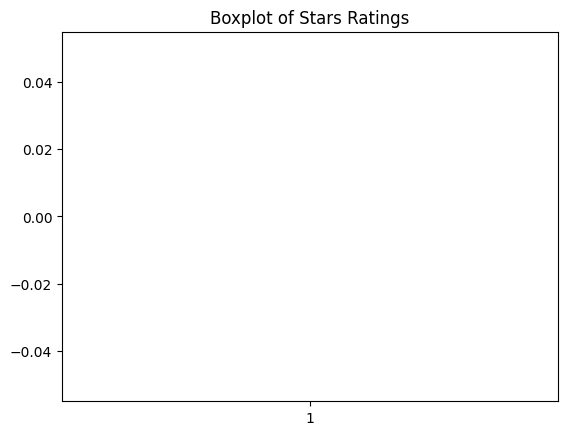

In [25]:
# 박스플롯을 사용한 이상치 탐지
import matplotlib.pyplot as plt

plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.show()

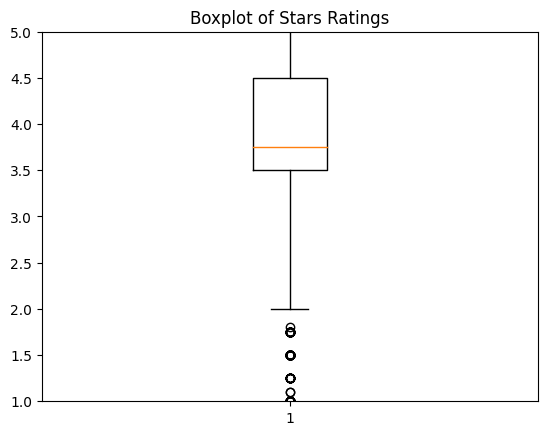

In [27]:
dataset = pd.read_csv('/content/sample_data/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')  # 인코딩이 필요한 경우 변경

# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

# NaN 값 제거
dataset = dataset.dropna(subset=['Stars'])

# 'Stars' 컬럼에 대한 박스플롯 생성
plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.ylim(1, 5)  # y축 범위를 1에서 5로 설정
plt.show()

In [ ]:
# 우리 부서의 핵심지표
# 데이터 분석 -> 실제로 핵심지표가 어떤지?
# 이걸 대시보드 -> 눈에 지표
# 떨어지는 지표 -> 개선
# 성장하는 지표 -> 더 성장!

# 지표 -> 기존 지표 -> 우리만의 지표!